In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

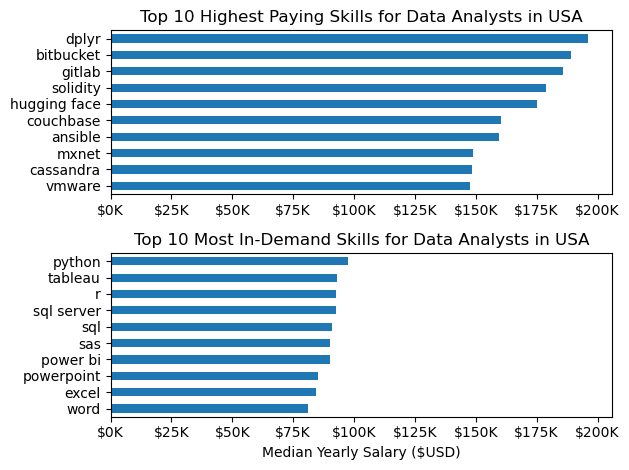

In [23]:
df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_USA = df_DA_USA.dropna(subset=['salary_year_avg'])
df_DA_USA = df_DA_USA.explode('job_skills')
df_DA_USA_group = df_DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_USA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_USA_top_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)
df_DA_USA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highest Paying Skills for Data Analysts in USA")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_USA_top_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts in USA")
ax[1].set_xlabel("Median Yearly Salary ($USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()